In [1]:
# September 2021

# Полезный код

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Введение

Ниже представлен код, который либо не нашел применение в основной части методички, либо часто требуется. Примеры даны на данных Goodreads (там, где это возможно). 

Весь код поделен на темы. Пояснения к коду, там где это необходимо, даны за знаком #.

В отдельных случаях даны также смысловые пояснения по логике, математике и прочему. Однако эта методичка не может считаться введением как в логику, так и в математику. Лучше и полнее об этом можно узнать из книг, список которых размещен [здесь](https://medium.com/data-science-with-ruslan-nazarov/книги-по-data-science-и-математике-для-начинающих-6257214d82d7)

В тех случаях, когда нужно внести изменения в изначально загруженные данные, я использую копию данных.

# Получение данных. Создание таблиц. SQL

In [3]:
# настройка вывода в pandas

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

In [4]:
# error_bad_lines=False позволяет игнорировать (не включать) 
# те строки в исходной (загружаемой) таблице, которые вызывают ошибки

db = pd.read_csv('D:/Data Science/Проекты/Metod_Goodreads/git_goodreads/gd_augmentation.csv', error_bad_lines=False)

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## SQL

In [5]:
"""

# приводится для примера

# cоздание SQL таблицы

CREATE TABLE table_name (
 column_a data_type,
 column_b data_type,
 column_c data_type
);

"""

'\n\n# приводится для примера\n\n# cоздание SQL таблицы\n\nCREATE TABLE table_name (\n column_a data_type,\n column_b data_type,\n column_c data_type\n);\n\n'

In [6]:
"""

# приводится для примера

# порядок ввода запросов SQL

SELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross

FROM films

WHERE release_year > 1990

GROUP BY release_year

HAVING  AVG(budget) > 60000000

ORDER BY avg_gross DESC;

"""

'\n\n# приводится для примера\n\n# порядок ввода запросов SQL\n\nSELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross\n\nFROM films\n\nWHERE release_year > 1990\n\nGROUP BY release_year\n\nHAVING  AVG(budget) > 60000000\n\nORDER BY avg_gross DESC;\n\n'

In [7]:
"""

# приводится для примера

# соединяем разные таблицы SQL

query = 

SELECT * 

FROM hpd311calls

JOIN weather 

ON hpd311calls.created_date = weather.date;



calls_with_weather = pd.read_sql(query, engine)

print(calls_with_weather.head())

"""

'\n\n# приводится для примера\n\n# соединяем разные таблицы SQL\n\nquery = \n\nSELECT * \n\nFROM hpd311calls\n\nJOIN weather \n\nON hpd311calls.created_date = weather.date;\n\n\n\ncalls_with_weather = pd.read_sql(query, engine)\n\nprint(calls_with_weather.head())\n\n'

## URL

In [8]:
"""

# приводится для примера

# базовый запрос для получения данных из url

api_url = "https://api.yelp.com/v3/businesses/search"
response = requests.get(api_url, 
                headers=headers, 
                params=params)
 data = response.json()
cafes = pd.DataFrame(data['businesses'])
print(cafes.dtypes)

"""

'\n\n# приводится для примера\n\n# базовый запрос для получения данных из url\n\napi_url = "https://api.yelp.com/v3/businesses/search"\nresponse = requests.get(api_url, \n                headers=headers, \n                params=params)\n data = response.json()\ncafes = pd.DataFrame(data[\'businesses\'])\nprint(cafes.dtypes)\n\n'

## Создание и сохранение таблицы

In [9]:
# генератор

data1 = [{'a': i, 'b': 2 *i} for i in range(3)] 
pd.DataFrame(data1)

,a,b
0,0,0
1,1,2
2,2,4


Генераторы часто используются, например для создания новых признаков или создания датафрейма. 

Генератор разбивается на две части: 

1) что необходимо выполнить; 
2) для значений, полученных с помощью цикла. 

В нашем случае надо в словаре к ключу 'a' добавить просто каждый элемент из цикла, а к ключу 'b' надо добавить значение из цикла, умноженное на 2.

Обратите внимание, что в этом случае легко создать датафрейм, так как датафреймы можно создавать из словаря, где ключ будет названием столбца, а значение ключа - наблюдением в датафрейме.

In [10]:
# пример работы генератора
# с отбором категориальных признаков

num_cols = [c for c in db.columns if db[c].dtype.name != 'object'] 

In [11]:
"""
# приводится для примера

# способ создать таблицу

coef = np.round(logreg.coef_, 3)
feat_labels = X_train.columns
for c, feature in zip(coef[0], feat_labels):
    print(feature, c)

"""

'\n# приводится для примера\n\n# способ создать таблицу\n\ncoef = np.round(logreg.coef_, 3)\nfeat_labels = X_train.columns\nfor c, feature in zip(coef[0], feat_labels):\n    print(feature, c)\n\n'

In [12]:
# сохраняем данные в таблицу

db.to_csv("goodreads_example.csv")

# Обработка данных

In [13]:
# извлекаем строки

db[8:10] 

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
8,the ultimate hitchhiker guide galaxy,4.38,eng,815,249558,4080,2000,2,0,1,46,0.0,1.0
9,the hitchhiker guide galaxy,4.22,eng,215,4930,460,2000,3,0,1,37,0.0,0.0


In [14]:
# извлекаем столбец

db['title'] 

0                   harry potter half blood prince
1                       harry potter order phoenix
2                     harry potter chamber secrets
3                    harry potter prisoner azkaban
4                   harry potter boxed set books 5
                           ...                    
10833    expelled eden a william t vollmann reader
10834                      you bright risen angels
10835                                the ice shirt
10836                                  poor people
10837                     las aventuras tom sawyer
Name: title, Length: 10838, dtype: object

In [15]:
# извлекаем несколько столбцов

db[['title', 'average_rating']] 

,title,average_rating
0,harry potter half blood prince,4.57
1,harry potter order phoenix,4.49
2,harry potter chamber secrets,4.42
3,harry potter prisoner azkaban,4.56
4,harry potter boxed set books 5,4.78
...,...,...
10833,expelled eden a william t vollmann reader,4.06
10834,you bright risen angels,4.08
10835,the ice shirt,3.96
10836,poor people,3.72


In [16]:
# извлекаем одновременно несколько строк и срез столбцов

db.loc[8:10, 'title' : 'ratings_count'] 

,title,average_rating,language_code,num_pages,ratings_count
8,the ultimate hitchhiker guide galaxy,4.38,eng,815,249558
9,the hitchhiker guide galaxy,4.22,eng,215,4930
10,the ultimate hitchhiker guide,4.38,eng,815,2877


In [17]:
# извлекаем одновременно несколько строк и список (не срез) столбцов

db.loc[8:10, ['title', 'language_code']] 

,title,language_code
8,the ultimate hitchhiker guide galaxy,eng
9,the hitchhiker guide galaxy,eng
10,the ultimate hitchhiker guide,eng


In [18]:
# подсчитываем уникальные значения
# по каждой категории

db['language_code'].value_counts()

eng      8669
en-US    1373
spa       217
en-GB     209
fre       142
         ... 
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, Length: 26, dtype: int64

In [19]:
# общее количество уникальных значений

db['title'].nunique() 

9968

In [20]:
# выбираем случайные значения из столбца

np.random.choice(db['num_pages'], 100, replace=False) 

array([ 686,  183,  160,  336,  543,  386,   73,  160,  504,  250,  393,
        384,  183,  399,  320,  208,  160,  592,  182,  208, 1238,  200,
        199,  160,  357,  303,  307,  235,   24,  280,  388,  363,  160,
        803,  184,  224,  134,  448,  352,   96,  207,  270,  261,  517,
        192,  195,  208,  544,  162,  244,  467,  464,  256,  288,  268,
         40,  288,  512,  384,  357,  280,  111,  419,  602,  184,  320,
         32,  957,  320,  197,  173,  304,   40,  125,  320,  272,  436,
        256,   48,  383,   32,  832, 1076,  267,  336,  232,  312,  467,
         32,  281,  534,   96,  400,  555,  228,  304,  416,  128,  100,
        352], dtype=int64)

In [21]:
# возвращает индекс минимума, можно и максимума

db['num_pages'].idxmin() 

784

In [22]:
# произвольное количество наибольших значений, наименьшие по nsmallest

db.nlargest(5, ['num_pages'])['title'] 

6301     the complete aubrey maturin novels
6602                   the second world war
10632               remembrance things past
6                   harry potter collection
6622                summa theologica 5 vols
Name: title, dtype: object

In [23]:
# извлекаем данные по логическому условию

db[db['average_rating'] > 4]

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,a última batalha,4.03,por,149,211,24,2000,3,1,1,17,0.000000,0.000000
10829,o sobrinho mágico,4.04,por,147,396,37,2000,2,1,1,21,0.000000,0.000000
10830,a viagem caminheiro da alvorada,4.09,por,176,161,14,2000,3,1,1,35,0.000000,0.000000
10833,expelled eden a william t vollmann reader,4.06,eng,512,156,20,2000,4,1,1,48,0.000000,0.000000


In [24]:
# удаление по инедксу

db4 = db.copy()
db4 = db4.drop(index=[6389]) # удаление по индексу

In [25]:
# излекаем данные по двум логическим условиям, которые пересекаются ("И")

db[(db['average_rating'] > 4) & (db['ratings_count'] > 1000)] 

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10770,when darkness will not lift doing what we can ...,4.13,eng,79,1279,126,2000,4,0,0,80,0.800000,0.200000
10773,when i don desire god how fight joy,4.19,eng,268,4446,218,2000,3,0,0,45,0.800000,0.200000
10776,the passion jesus christ,4.23,eng,127,6164,136,2000,1,0,0,27,0.000000,0.000000
10798,his dark materials,4.26,eng,933,2656,260,2000,2,0,1,19,-0.150000,0.400000


Если у вас два множества: А и B, то пересечение означает, что вы берете только те элементы, которые принадлежат A и B одновременно. Важно отличать этот случай от объединения, когда вы берете те элементы, которые одновременно принадлежат как А, так и B (из этого также следует, что в объединении вы получаете и элементы, которые находятся в пересечении).

In [26]:
# пример удаления по названию 

db1 = db.copy()
db1 = db.query('title not in ["harry potter half blood prince", "harry potter order phoenix"]')

# если сравнить с таблицей выше, то видно
# что были удалены наблюдения под индексами 0 и 1
# в которых title соответствовал указанным значениям

db1

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000
5,unauthorized harry potter book seven news half...,3.74,en-US,152,19,1,2000,2,0,0,87,-0.166667,0.166667
6,harry potter collection,4.73,eng,3342,28242,808,2000,3,0,1,24,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,expelled eden a william t vollmann reader,4.06,eng,512,156,20,2000,4,1,1,48,0.000000,0.000000
10834,you bright risen angels,4.08,eng,635,783,56,1980,4,0,0,27,0.700000,0.800000
10835,the ice shirt,3.96,eng,415,820,95,1990,3,0,1,14,0.000000,0.000000
10836,poor people,3.72,eng,434,769,139,2000,1,0,0,11,-0.400000,0.600000


In [27]:
# поиск в ячейках по значению

db[db['title'].str.contains('harry')]

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,harry potter und der gefangene von askaban,4.56,ger,13,313,8,2000,3,1,1,43,0.000000,0.000000
10086,harry potter sırlar odası,4.42,tur,403,1000,41,2000,4,1,1,29,0.000000,0.000000
10087,harry potter und der gefangene von askaban,4.56,ger,448,30,2,2000,2,0,1,43,0.000000,0.000000
10409,harry potter philosopher stone,4.47,gla,250,11,0,2010,3,0,1,41,0.000000,0.000000


Данный код позволяет нам отбирать те наблюдения, у которых признак (**title** в нашем случае) содержит какое-либо выражение. Здесь, например, мы отобрали все книги, в заголовке которых упоминается harry.

Хорошее введение по регулярным выражениям см. [здесь](https://developers.google.com/edu/python/regular-expressions). Больше про регулярные выражения появится в последующих редакциях методички.

In [28]:
# удаляем столбцы

db2 = db.copy()
db2 = db2.drop(["polarity", "subjectivity"], axis=1)
db2

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34
...,...,...,...,...,...,...,...,...,...,...,...
10833,expelled eden a william t vollmann reader,4.06,eng,512,156,20,2000,4,1,1,48
10834,you bright risen angels,4.08,eng,635,783,56,1980,4,0,0,27
10835,the ice shirt,3.96,eng,415,820,95,1990,3,0,1,14
10836,poor people,3.72,eng,434,769,139,2000,1,0,0,11


In [29]:
# проверяем на соответствие условию
# можно взять также any

np.all(db["num_pages"] > 100)

False

All означает, что мы задаем такой вопрос: все ли значения количества страниц больше 100. Получаем ответ: нет. Если взять any, то вопрос будет: есть ли значения больше 100 в количестве страниц?

In [30]:
# случайный отбор данных из таблицы

db.sample(n=10, random_state=1) 

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
7265,blood meridian,4.17,eng,335,539,62,2000,3,0,0,14,0.000000,0.000000
662,tea jane austen,3.79,eng,128,1442,108,2000,3,1,0,20,0.000000,0.000000
7155,heartsnatcher,3.97,en-GB,245,2430,77,2000,4,1,0,13,0.000000,0.000000
2954,day,3.84,eng,109,7332,465,2000,1,1,1,4,0.000000,0.000000
4962,flowers algernon,4.12,eng,311,337596,9949,2000,2,0,0,20,0.000000,0.000000
9372,fermat enigma the epic quest solve world great...,4.25,eng,315,19473,692,1990,3,0,0,82,0.366667,0.466667
3585,poetics music form six lessons,4.11,eng,160,988,31,1970,1,1,0,43,0.000000,0.000000
10587,weetzie bat,3.74,eng,128,13013,1025,2000,3,0,1,12,0.000000,0.000000
9823,europe people without history,4.12,eng,534,995,32,1980,4,0,0,37,0.000000,0.000000
3764,tramps like us volume 9,4.32,en-GB,185,562,11,2000,2,0,1,24,0.000000,0.000000


In [31]:
# изменение типа данных

db2['tra_co'] = db2['tra_co'].astype('int')

# Создание новых признаков

In [32]:
# создание нового признака
# с помощью lambda функции

db2 = db.copy()
db2["example"] = db2["language_code"].apply(lambda x: "English" if "eng" in x else "other")
db2

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,example
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,English
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,English
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000,English
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000,English
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,expelled eden a william t vollmann reader,4.06,eng,512,156,20,2000,4,1,1,48,0.000000,0.000000,English
10834,you bright risen angels,4.08,eng,635,783,56,1980,4,0,0,27,0.700000,0.800000,English
10835,the ice shirt,3.96,eng,415,820,95,1990,3,0,1,14,0.000000,0.000000,English
10836,poor people,3.72,eng,434,769,139,2000,1,0,0,11,-0.400000,0.600000,English


Так как этот подход к созданию новых признаков очень распространен, то давайте остановимся на нем подробнее. Что же здесь происходит?

1) мы указываем, что хотим создать новый признак **db2["example"]**;
2) далее указываем, на основании какого имеющегося признака создадим новый, в нашем случае это **db2["language_code"]**;
3) вызываем apply с лямбда-функцией. Эту функцию надо читать так: передаем x (lambda x:); функция должна вернуть новое значение ("English"), если выполняется условие (if "eng" in x), в противном случае возвращается другой вариант нового значения (else "other").

In [33]:
# разбиение на интервалы

db2['average_rating_dig'] = np.digitize(db2['average_rating'], bins=[0, 1, 2, 3, 4, 5])
db2

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,example,average_rating_dig
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,English,5
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,English,5
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000,English,5
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000,English,5
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000,English,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,expelled eden a william t vollmann reader,4.06,eng,512,156,20,2000,4,1,1,48,0.000000,0.000000,English,5
10834,you bright risen angels,4.08,eng,635,783,56,1980,4,0,0,27,0.700000,0.800000,English,5
10835,the ice shirt,3.96,eng,415,820,95,1990,3,0,1,14,0.000000,0.000000,English,4
10836,poor people,3.72,eng,434,769,139,2000,1,0,0,11,-0.400000,0.600000,English,4


In [34]:
# выбираем только категориальные колонки

categorical_columns = [c for c in db.columns if db[c].dtype.name == 'object'] 

# замена категорй

db8 = db.copy()
db8['lcode'] = np.where((db8['language_code'] == 'jpn') | (db8['language_code'] == 'mul'), 'other', db8['language_code']) 

In [35]:
# используем map, чтобы создать колонку по ключевым словам из других

db12 = db.copy()

example = {'eng': 'English', 'spa':'Spanish'}
db12['example2'] = db12['language_code'].map(example)
db12.head()

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,example2
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,English
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,English
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000,English
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000,English
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000,English


In [36]:
"""
# приводится для примера

# бининг

bins = [0, 3, 4, 5, 6]
groups_names = ['Lower', 'Low', 'Average', 'High']
train['rat'] = pd.cut(train['average_rating'], bins, labels=groups_names, right=False)
test['rat'] = pd.cut(test['average_rating'], bins, labels=groups_names, right=False)

# автоматический бининг

from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(encode='onehot-dense')
rat_train = kbd.fit_transform(X_train[['text_reviews_count']]) 
rat_test = kbd.transform(X_test[['text_reviews_count']]) 

"""

"\n# приводится для примера\n\n# бининг\n\nbins = [0, 3, 4, 5, 6]\ngroups_names = ['Lower', 'Low', 'Average', 'High']\ntrain['rat'] = pd.cut(train['average_rating'], bins, labels=groups_names, right=False)\ntest['rat'] = pd.cut(test['average_rating'], bins, labels=groups_names, right=False)\n\n# автоматический бининг\n\nfrom sklearn.preprocessing import KBinsDiscretizer\nkbd = KBinsDiscretizer(encode='onehot-dense')\nrat_train = kbd.fit_transform(X_train[['text_reviews_count']]) \nrat_test = kbd.transform(X_test[['text_reviews_count']]) \n\n"

# Обработка пропущенных значений

In [37]:
# проверка на пропущенные значения по всей таблице
# с подчсчетом количества пропусков

db.isna().sum() 

title             0
average_rating    0
language_code     0
num_pages         0
ratings_count     0
                 ..
tra_co            0
multivolume       0
len_title         0
polarity          0
subjectivity      0
Length: 13, dtype: int64

In [38]:
# создание пропуска

db7 = db.copy()
db7.loc['2006-09-16', 'average_rating'] = np.nan 

In [39]:
# заполнение пропусков в прямом порядке, bfill в обратном, возможна также интерполяция

db['num_pages'] = db['num_pages'].fillna(method='ffill') 

  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
title             0
average_rating    0
language_code     0
num_pages         0
ratings_count     0
                 ..
tra_co            0
multivolume       0
len_title         0
polarity          0
subjectivity      0
Length: 13, dtype: int64


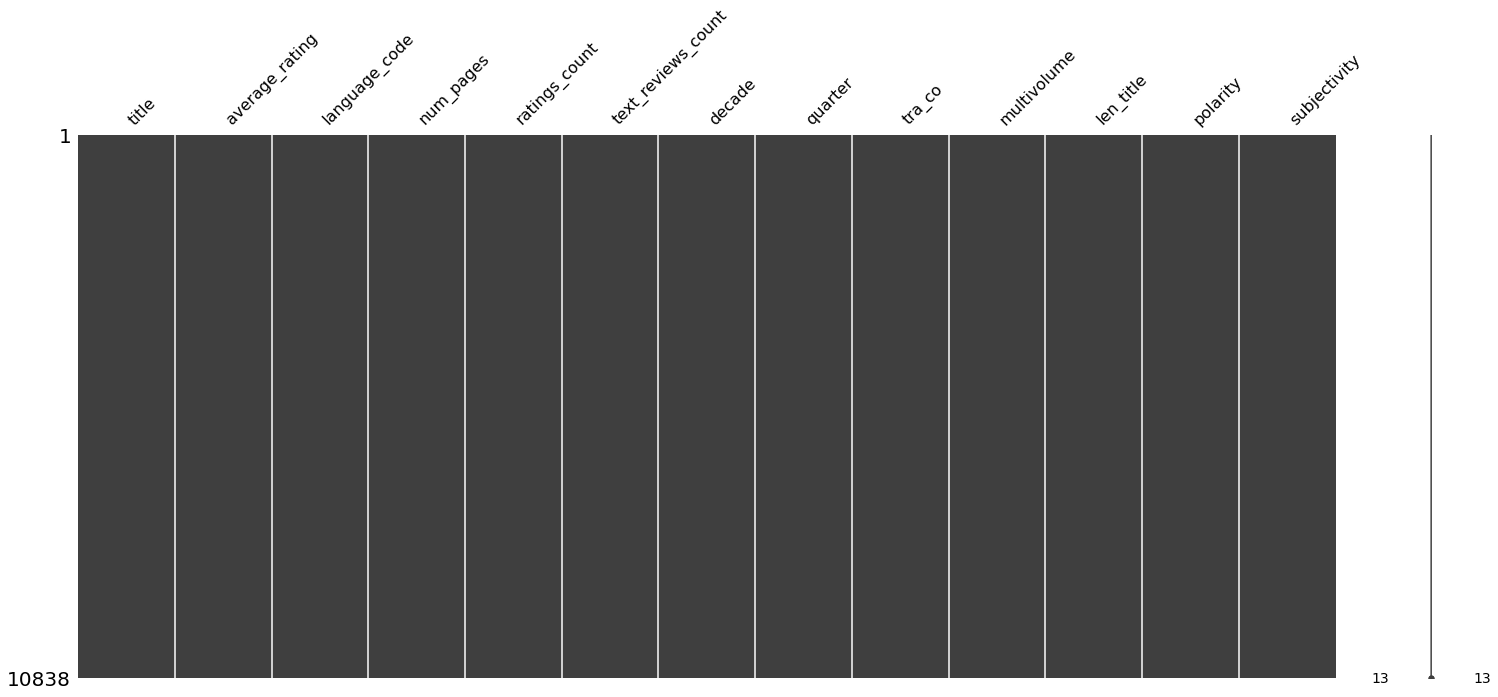

In [40]:
! pip install missingno

import missingno as msno

# визуализация пропусков с помощью msno

print(db.isna().sum())
msno.matrix(db)
plt.show()

In [41]:
"""
# приводится для примера

Выделяем пропуски, смотрим их описание, визуализируем

print(db.isna().sum())
msno.matrix(db)
plt.show()
missing = db[db['average_rating'].isna()]
examp = db[~db['average_rating'].isna()]
db_sorted = db.sort_values('average_rating')
msno.matrix(db_sorted)
plt.show()

"""

"\n# приводится для примера\n\nВыделяем пропуски, смотрим их описание, визуализируем\n\nprint(db.isna().sum())\nmsno.matrix(db)\nplt.show()\nmissing = db[db['average_rating'].isna()]\nexamp = db[~db['average_rating'].isna()]\ndb_sorted = db.sort_values('average_rating')\nmsno.matrix(db_sorted)\nplt.show()\n\n"

In [42]:
# перестроить индекс таблицы по индексу другой таблицы и заполнить пропуски

db8 = db2.reindex(db1.index, method='ffill')

# Работа с текстом

In [43]:
db6 = db.copy()
db6['title'].str.split()

0                     [harry, potter, half, blood, prince]
1                          [harry, potter, order, phoenix]
2                        [harry, potter, chamber, secrets]
3                       [harry, potter, prisoner, azkaban]
4                    [harry, potter, boxed, set, books, 5]
                               ...                        
10833    [expelled, eden, a, william, t, vollmann, reader]
10834                         [you, bright, risen, angels]
10835                                    [the, ice, shirt]
10836                                       [poor, people]
10837                        [las, aventuras, tom, sawyer]
Name: title, Length: 10838, dtype: object

In [44]:
# количество вхождений набора букв love

db6['title'].str.contains('love').sum()

211

In [45]:
# функция для удаления пунктуации

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [46]:
"""
# приводится для примера

# удаляем все имена кроме первого, эти последующие - это переводчики как правило

db['authors'] = db['authors'].str.split(',').str[0]

"""

"\n# приводится для примера\n\n# удаляем все имена кроме первого, эти последующие - это переводчики как правило\n\ndb['authors'] = db['authors'].str.split(',').str[0]\n\n"

In [47]:
"""

# приводится для примера

# способ подсчета частоты слов с помощью метрики tf-idf и ДО стемминга

count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['text'])
dictionary = count_vectorizer.vocabulary_.items() 
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

"""

"\n\n# приводится для примера\n\n# способ подсчета частоты слов с помощью метрики tf-idf и ДО стемминга\n\ncount_vectorizer = CountVectorizer()\ncount_vectorizer.fit(data['text'])\ndictionary = count_vectorizer.vocabulary_.items() \nvocab = []\ncount = []\nfor key, value in dictionary:\n    vocab.append(key)\n    count.append(value)\nvocab_bef_stem = pd.Series(count, index=vocab)\nvocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)\ntop_vacab = vocab_bef_stem.head(20)\ntop_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))\n\n"

In [48]:
"""

# приводится для примера

# способ подсчета частоты слов с помощью метрики tf-idf и ПОСЛЕ стемминга


stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
data['text'] = data['text'].apply(stemming)
data.head(10)

tfid_vectorizer = TfidfVectorizer("english")

tfid_vectorizer.fit(data['text'])

dictionary = tfid_vectorizer.vocabulary_.items()  

vocab = []
count = []

for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)

vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

"""

'\n\n# приводится для примера\n\n# способ подсчета частоты слов с помощью метрики tf-idf и ПОСЛЕ стемминга\n\n\nstemmer = SnowballStemmer("english")\n\ndef stemming(text):    \n    \'\'\'a function which stems each word in the given text\'\'\'\n    text = [stemmer.stem(word) for word in text.split()]\n    return " ".join(text) \ndata[\'text\'] = data[\'text\'].apply(stemming)\ndata.head(10)\n\ntfid_vectorizer = TfidfVectorizer("english")\n\ntfid_vectorizer.fit(data[\'text\'])\n\ndictionary = tfid_vectorizer.vocabulary_.items()  \n\nvocab = []\ncount = []\n\nfor key, value in dictionary:\n    vocab.append(key)\n    count.append(value)\n\nvocab_after_stem = pd.Series(count, index=vocab)\n\nvocab_after_stem = vocab_after_stem.sort_values(ascending=False)\n\ntop_vacab = vocab_after_stem.head(20)\ntop_vacab.plot(kind = \'barh\', figsize=(5,10), xlim= (15120, 15145))\n\n'

In [49]:
# смотрим количество символов в названии книг

db['title'].str.len().sort_values(ascending=False)[:5] 

7242    226
826     184
4555    182
2711    170
9527    164
Name: title, dtype: int64

In [50]:
"""

# приводится для примера

! pip install fuzzywuzzy

from fuzzywuzzy import process

# проверяем редакторскую длину, 
# чтобы определить ошибочные написания слова

unique_types = db['title'].unique()
print(process.extract('horry', unique_types, limit = len(unique_types)))

"""

"\n\n# приводится для примера\n\n! pip install fuzzywuzzy\n\nfrom fuzzywuzzy import process\n\n# проверяем редакторскую длину, \n# чтобы определить ошибочные написания слова\n\nunique_types = db['title'].unique()\nprint(process.extract('horry', unique_types, limit = len(unique_types)))\n\n"

In [51]:
"""
# приводится для примера

# поиск по тексту файла

with open('alice.txt') as file:
  text = file.read()
n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1
 print('Lewis Carroll uses the word "cat" {} times'.format(n))

"""

'\n# приводится для примера\n\n# поиск по тексту файла\n\nwith open(\'alice.txt\') as file:\n  text = file.read()\nn = 0\nfor word in text.split():\n  if word.lower() in [\'cat\', \'cats\']:\n    n += 1\n print(\'Lewis Carroll uses the word "cat" {} times\'.format(n))\n\n'

In [52]:
"""
# приводится для примера

# убрать лишние символы из строк в ячейках

chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['title']
for col in cols_to_clean:
        for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
         apps[col] = pd.to_numeric(int)

"""

"\n# приводится для примера\n\n# убрать лишние символы из строк в ячейках\n\nchars_to_remove = ['+', ',', 'M', '$']\ncols_to_clean = ['title']\nfor col in cols_to_clean:\n        for char in chars_to_remove:\n        apps[col] = apps[col].str.replace(char, '')\n         apps[col] = pd.to_numeric(int)\n\n"

# Работа с датами

In [53]:
db6 = pd.read_csv('D:/Data Science/Проекты/Metod_Goodreads/data/books.csv', error_bad_lines=False, parse_dates=['publication_date'])
db6['publication_date'] = pd.to_datetime(db6['publication_date'], format='%m/%d/%Y', errors='coerce')
db6 = db6.set_index(pd.DatetimeIndex(db6['publication_date']))

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [54]:
# группировка данных по заданным 
# интервалам дат

db6.resample('Y').sum()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
publication_date,,,,,,
1900-12-31,37134,3.88,9780753812938,144,332,33
1901-12-31,0,0.00,0,0,0,0
1902-12-31,0,0.00,0,0,0,0
1903-12-31,0,0.00,0,0,0,0
1904-12-31,0,0.00,0,0,0,0
...,...,...,...,...,...,...
2016-12-31,172220,23.42,58699458875058,1446,19088,1366
2017-12-31,138204,27.07,68466805155270,2412,5639,168
2018-12-31,117222,20.07,48919926747252,1064,4572,331


In [55]:
# проходим по нужному периоду времени 
# и считаем статистики

db6 = pd.read_csv('D:/Data Science/Проекты/Metod_Goodreads/data/books.csv', error_bad_lines=False, parse_dates=['publication_date'])
db6['publication_date'] = pd.to_datetime(db6['publication_date'], format='%m/%d/%Y', errors='coerce')
db6 = db6.set_index(pd.DatetimeIndex(db6['publication_date']))

db10 = db6['average_rating'].resample('6h').mean()
db11 = db6['average_rating'].resample('D').count()

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


# Объединение таблиц

In [56]:
db4 = db.copy()
db4

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,expelled eden a william t vollmann reader,4.06,eng,512,156,20,2000,4,1,1,48,0.000000,0.000000
10834,you bright risen angels,4.08,eng,635,783,56,1980,4,0,0,27,0.700000,0.800000
10835,the ice shirt,3.96,eng,415,820,95,1990,3,0,1,14,0.000000,0.000000
10836,poor people,3.72,eng,434,769,139,2000,1,0,0,11,-0.400000,0.600000


In [57]:
# разделяю на две таблицы, чтобы соединить

db4 = db.copy()
db4_1 = db4.loc[0:3, ['title', 'average_rating', 'language_code']] 
db4_2 = db4.loc[4:6, ['title', 'average_rating', 'language_code']]

# соединяем по строкам

pd.concat([db4_1, db4_2], ignore_index=True)

,title,average_rating,language_code
0,harry potter half blood prince,4.57,eng
1,harry potter order phoenix,4.49,eng
2,harry potter chamber secrets,4.42,eng
3,harry potter prisoner azkaban,4.56,eng
4,harry potter boxed set books 5,4.78,eng
5,unauthorized harry potter book seven news half...,3.74,en-US
6,harry potter collection,4.73,eng


In [58]:
# объединяем по столбцам

pd.concat([db4_1, db4_2], axis="columns") 

,title,average_rating,language_code,title,average_rating,language_code
0,harry potter half blood prince,4.57,eng,NaN,NaN,NaN
1,harry potter order phoenix,4.49,eng,NaN,NaN,NaN
2,harry potter chamber secrets,4.42,eng,NaN,NaN,NaN
3,harry potter prisoner azkaban,4.56,eng,NaN,NaN,NaN
4,NaN,NaN,NaN,harry potter boxed set books 5,4.78,eng
5,NaN,NaN,NaN,unauthorized harry potter book seven news half...,3.74,en-US
6,NaN,NaN,NaN,harry potter collection,4.73,eng


Почему здесь возникает NaN? Потому что в первой таблице нет значение 4, 5, 6, а во второй нет значений 0, 1, 2, 3. В этом случае мы как бы сбоку подставляем к одной таблице другую.

In [59]:
db4 = db.copy()
db4_1 = db4.loc[0:3, ['title', 'average_rating', 'language_code']] 
db4_2 = db4.loc[4:6, ['title', 'num_pages', 'language_code']]

# соединяем по строкам
# только по совпадающим столбцам

pd.concat([db4_1, db4_2], join='inner')

,title,language_code
0,harry potter half blood prince,eng
1,harry potter order phoenix,eng
2,harry potter chamber secrets,eng
3,harry potter prisoner azkaban,eng
4,harry potter boxed set books 5,eng
5,unauthorized harry potter book seven news half...,en-US
6,harry potter collection,eng


In [60]:
db4 = db.copy()
db4_1 = db4.loc[0:3, ['title', 'average_rating']] 
db4_2 = db4.loc[0:6, ['title', 'language_code']]

# правое объединение

db4_1.merge(db4_2, how="right")

,title,average_rating,language_code
0,harry potter half blood prince,4.57,eng
1,harry potter order phoenix,4.49,eng
2,harry potter chamber secrets,4.42,eng
3,harry potter prisoner azkaban,4.56,eng
4,harry potter boxed set books 5,NaN,eng
5,unauthorized harry potter book seven news half...,NaN,en-US
6,harry potter collection,NaN,eng


Здесь мы используем стобцы из правой таблицы для объединения с левой. Ниже наоборот.

In [61]:
db4 = db.copy()
db4_1 = db4.loc[0:3, ['title', 'average_rating']] 
db4_2 = db4.loc[0:6, ['title', 'language_code']]

# левое объединение

db4_1.merge(db4_2, how="left")

,title,average_rating,language_code
0,harry potter half blood prince,4.57,eng
1,harry potter order phoenix,4.49,eng
2,harry potter chamber secrets,4.42,eng
3,harry potter prisoner azkaban,4.56,eng


# Сортировка. Группировка

In [62]:
# сортировка по двум значениям
# сначала сортировка идет по первому значению
# а затем, внутри первого, по второму

db.sort_values(by=["average_rating", "text_reviews_count"], ascending=False) 

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
4680,the diamond color meditation color pathway soul,5.00,eng,74,5,3,2000,1,0,0,55,0.000000,0.000000
839,literature circle guide bridge terabithia ever...,5.00,eng,32,4,1,2000,1,0,0,163,0.675000,0.950000
6056,the new big book america,5.00,eng,56,2,1,2000,1,1,0,27,0.068182,0.277273
8312,fanning flame bible cross mission,5.00,eng,336,1,1,2000,2,1,0,44,0.000000,0.000000
9043,oliver wendell holmes paris medicine theology ...,5.00,eng,179,1,1,2000,1,0,0,91,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,the boys archangel raphael a youth confraterni...,2.00,eng,498,1,0,1990,2,0,0,79,0.000000,0.000000
5409,mcdougal littell science student edition grade...,2.00,eng,972,3,0,2000,2,1,0,68,0.000000,0.000000
6639,the two tocquevilles father son,2.00,eng,254,1,0,1980,2,0,0,36,0.000000,0.000000
7778,the art loving erich fromm a true story japane...,1.67,eng,227,3,2,2000,4,0,0,66,0.316667,0.533333


In [63]:
# группируем, а затем получаем статистики
# по каждому признаку

db5 = db.groupby("language_code").aggregate(['min', np.median, 'max'])
db5.head(5)

average_rating              num_pages               \
                         min median   max       min median   max   
language_code                                                      
ale                     4.36   4.36  4.36       512  512.0   512   
ara                     3.55   3.55  3.55       349  349.0   349   
en-CA                   3.66   4.05  4.21       160  246.0   388   
en-GB                   2.67   3.93  4.72        32  288.0  1262   
en-US                   2.33   3.94  4.88        12  304.0  2480   

              ratings_count                 text_reviews_count  ...  \
                        min  median     max                min  ...   
language_code                                                   ...   
ale                     102   102.0     102                 16  ...   
ara                     122   122.0     122                 12  ...   
en-CA                  1024  4513.0    6256                102  ...   
en-GB                     1   199.0  105507                  0  ...   
en-US                     1   562.0  191577                  0  ...   

              multivolume len_title             polarity              \
                      max       min median  max      min median  max   
language_code                                                          
ale                     1        18   18.0   18      0.0    0.0  0.0   
ara                     0         4    4.0    4      0.0    0.0  0.0   
en-CA                   1         8   31.0   51     -0.5    0.0  0.0   
en-GB                   1         4   23.0  130     -0.8    0.0  1.0   
en-US                   1         4   24.0  254     -1.0    0.0  1.0   

              subjectivity               
                       min median   max  
language_code                            
ale                    0.0    0.0  0.00  
ara                    0.0    0.0  0.00  
en-CA                  0.0    0.3  0.55  
en-GB                  0.0    0.0  1.00  
en-US                  0.0    0.0  1.00  

[5 rows x 33 columns]

In [64]:
# применение pivot table

db2 = db.copy()
db2["example"] = db2["language_code"].apply(lambda x: "English" if "eng" in x else "other")
db2.pivot_table("num_pages", index='language_code', columns='example').head(5)

example,English,other
language_code,,
ale,NaN,512.000000
ara,NaN,349.000000
en-CA,NaN,252.000000
en-GB,NaN,322.976077
en-US,NaN,338.742899


Pivot table очень популярный инструмент. В принципе это своего родо группировка с подсчетом метрик по группам. Что здесь происходит? Мы указываем метрику, которую хотим подсчитать (**num_pages**). Мы хотим ее подсчитать по каким-то группам. Чтобы определить эти группы мы задаем два параметра: индекс или строки (**language_code**) и столбцы (**example**). Пересечение параметров, то есть ячейки, это и есть наши группы, для каждой из которых мы считаем метрику.

In [65]:
# разбиваем данные на интервалы

interval = pd.cut(db['len_title'], [10, 30, 100])
interval

0        (30, 100]
1        (30, 100]
2        (30, 100]
3        (30, 100]
4        (30, 100]
           ...    
10833    (30, 100]
10834     (10, 30]
10835     (10, 30]
10836     (10, 30]
10837     (10, 30]
Name: len_title, Length: 10838, dtype: category
Categories (2, interval[int64, right]): [(10, 30] < (30, 100]]

In [66]:
# применение pivot table с учетом интервалов

db2.pivot_table('num_pages', index=['language_code', interval], columns='example').head(5)

example                  English       other
language_code len_title                     
ale           (10, 30]       NaN  512.000000
en-CA         (10, 30]       NaN  203.000000
              (30, 100]      NaN  242.500000
en-GB         (10, 30]       NaN  320.469027
              (30, 100]      NaN  328.486842

In [67]:
# разбиение на интервалы по квантилям

inter_quant = pd.cut(db['num_pages'], 2)

In [68]:
# применение pivot table 
# с получением метрик по нескольким признакам

db2.pivot_table(index='language_code', columns='example', aggfunc={'average_rating': 'mean', "num_pages": sum}).head(5)

average_rating           num_pages          
example              English     other   English     other
language_code                                             
ale                      NaN  4.360000       NaN     512.0
ara                      NaN  3.550000       NaN     349.0
en-CA                    NaN  4.025714       NaN    1764.0
en-GB                    NaN  3.916029       NaN   67502.0
en-US                    NaN  3.910736       NaN  465094.0

<AxesSubplot:xlabel='language_code'>

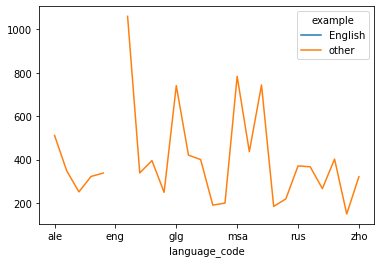

In [69]:
# применение pivot table 
# с построением графика

db2.pivot_table('num_pages', index='language_code', columns='example', aggfunc='mean').plot() 

In [70]:
# ранжируем от наименьшего до наибольшего

db[['num_pages']].rank() 

,num_pages
0,9996.5
1,10507.0
2,6703.5
3,8378.5
4,10832.0
...,...
10833,9207.5
10834,9915.0
10835,8011.0
10836,8368.0


In [71]:
"""
# приводится для примера

# группировка одной таблицы по столбцам другой таблицы

life_by_region = db2.groupby(db6['tra_co'])
print(life_by_region['2010'].mean())

"""

"\n# приводится для примера\n\n# группировка одной таблицы по столбцам другой таблицы\n\nlife_by_region = db2.groupby(db6['tra_co'])\nprint(life_by_region['2010'].mean())\n\n"

# Разное

In [72]:
# функция итерации по словарю

def report_status(**kwargs):
    print("\nBEGIN: REPORT\n")
    for key, value in kwargs.items():
        print(key + ": " + value)
    print("\nEND REPORT")

In [73]:
"""

# приводится для примера

# среднее по всем колонкам

db.apply(np.mean, axis=0)


# среднее по всем строкам

db.apply(np.mean, axis=1)

"""

'\n\n# приводится для примера\n\n# среднее по всем колонкам\n\ndb.apply(np.mean, axis=0)\n\n\n# среднее по всем строкам\n\ndb.apply(np.mean, axis=1)\n\n'

<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

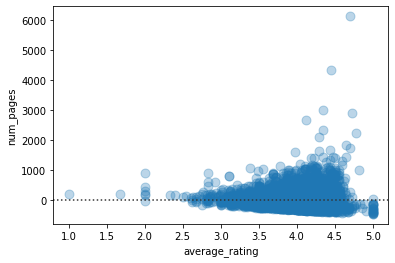

In [74]:
# разброс остатков

sns.residplot(x='average_rating', y='num_pages', data=db, scatter_kws={'s':80, 'alpha': 0.3}) 

# Различные типы графиков

fig, ax = plt.subplots(figsize=(15, 5))
plt.hexbin(db['average_rating'], db['num_pages'])
plt.colorbar()
plt.xlim(2.5, 5.0) 
plt.title('Отношение оценок к количеству страниц')

In [75]:
# получаем значения гистограммы без постройки

counts, bin_edges = np.histogram(db['average_rating'], bins=5) 
counts

array([   2,   10,  419, 8463, 1944], dtype=int64)

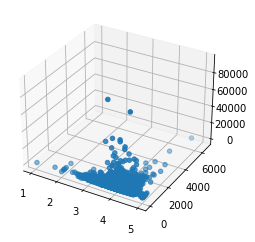

In [76]:
# 3-d график

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(db['average_rating'], db['num_pages'], db['text_reviews_count'])

example  English  other
tra_co                 
0           5232   1260
1           3437    909


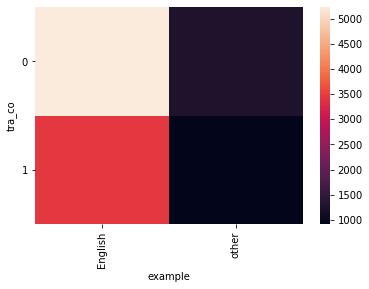

In [77]:
# делаем карту

pd_crosstab = pd.crosstab(db2["tra_co"], db2["example"])
print(pd_crosstab)
sns.heatmap(pd_crosstab)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


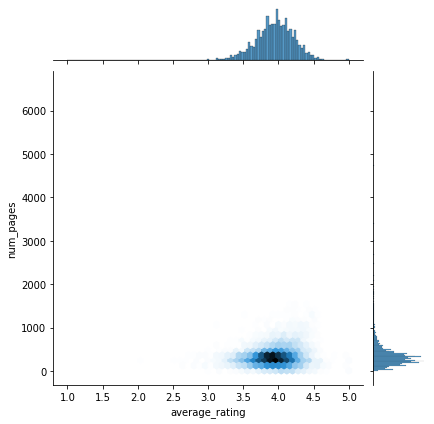

In [78]:
sns.jointplot(db['average_rating'], db['num_pages'], kind='hex')

<AxesSubplot:xlabel='example', ylabel='average_rating'>

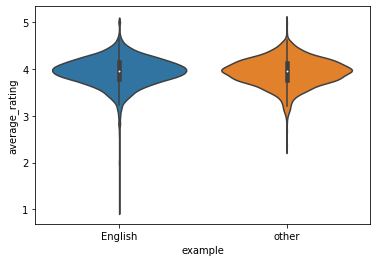

In [79]:
# скрипичные графики это гистограммы, но сразу с оценкой плотности

sns.violinplot(x='example', y = 'average_rating', data=db2) 

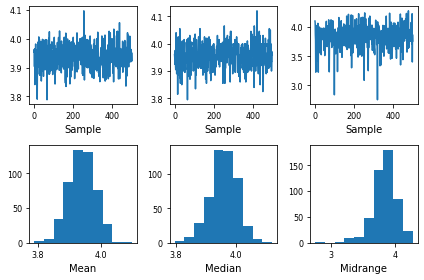

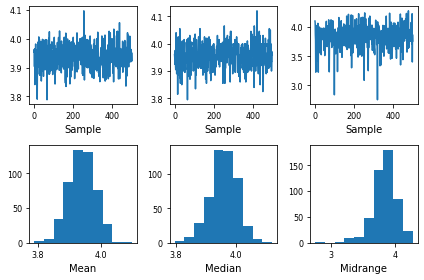

In [80]:
pd.plotting.bootstrap_plot(db['average_rating'])

Text(0.5, 1.0, 'Зависимость средней оценки от квартала')

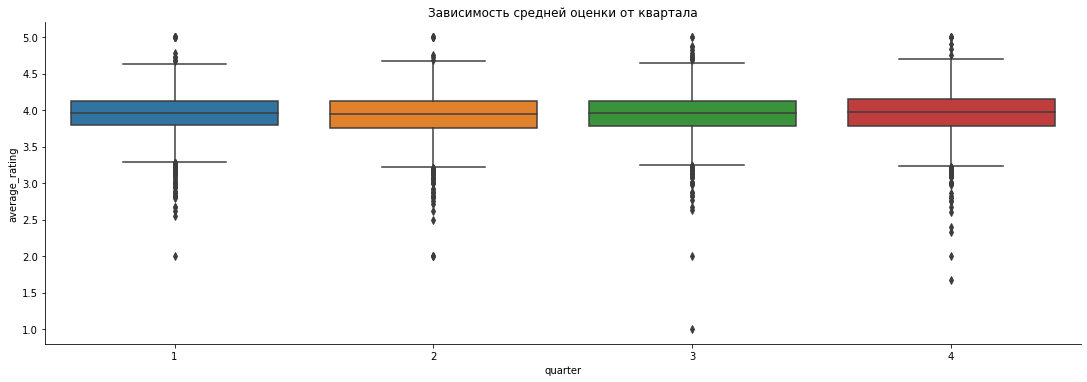

In [81]:
sns.catplot(kind='box', x='quarter', y='average_rating', data=db, aspect=3)
plt.title('Зависимость средней оценки от квартала')

<AxesSubplot:xlabel='average_rating', ylabel='ratings_count'>

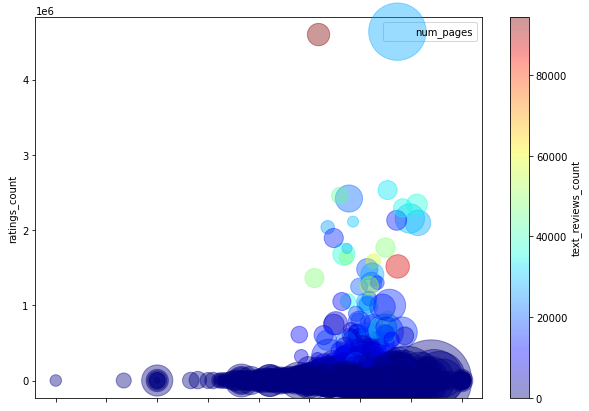

In [82]:
db.plot(kind='scatter', x='average_rating', y = 'ratings_count', alpha=0.4, s=db['num_pages'], figsize=(10, 7), 
             c='text_reviews_count', cmap=plt.get_cmap('jet'), colorbar=True, label='num_pages')

<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

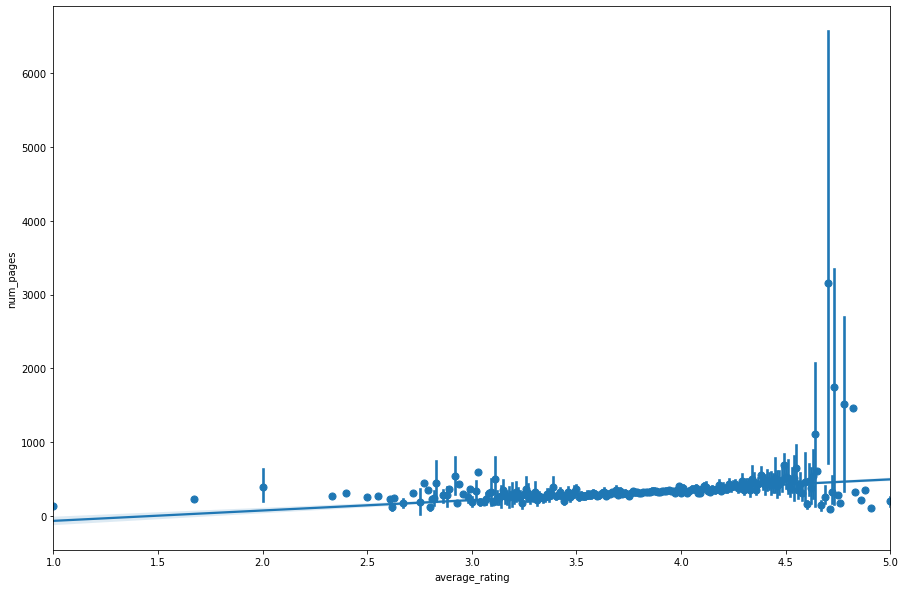

In [83]:
# если на значении из x лежит несколько значений y, то они усредняются

fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='average_rating', y='num_pages', data = db, x_estimator=np.mean) 

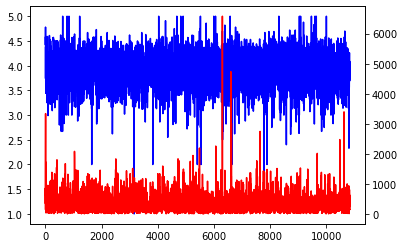

In [84]:
# если столбцы заданы в сильно отличающихся шкалах, то можно построить две оси y на одном графике

fig, ax = plt.subplots()
ax.plot(db.index, db2['average_rating'], color='blue')
ax2 = ax.twinx()
ax2.plot(db.index, db2['num_pages'], color='red')
plt.show()

In [85]:
# функция для построения графиков

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  axes.plot(x, y, color=color)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)
  axes.tick_params('y', colors=color)

In [86]:
"""
# приводится для примера  

# построение графиков циклом

fig, ax = plt.subplots()
for x in data:
  graf_df = db2[db2['example'] == x]
  ax.bar(x, graf_df['average_rating'].mean(), yerr=graf_df['average_rating'].std())
ax.set_ylabel("average_rating")
ax.set_xticklabels(x, rotation=90)

"""

'\n# приводится для примера  \n\n# построение графиков циклом\n\nfig, ax = plt.subplots()\nfor x in data:\n  graf_df = db2[db2[\'example\'] == x]\n  ax.bar(x, graf_df[\'average_rating\'].mean(), yerr=graf_df[\'average_rating\'].std())\nax.set_ylabel("average_rating")\nax.set_xticklabels(x, rotation=90)\n\n'

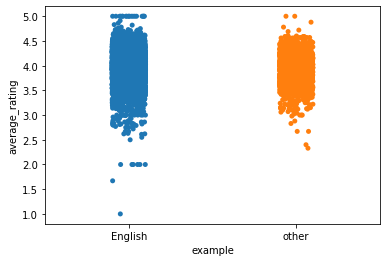

In [87]:
# стрипплоты, линейный плот

sns.stripplot(data=db2,
         x='example',
         y='average_rating',
         jitter=True)
plt.show()

# Построение нескольких графиков

Как правило, построить несколько графиков на одной подложке можно, если 

1) в одном вызове объединить несколько графиков; 
2) в одном графике указать два и более столбцов; 
3) воспользоваться внутренними параметрами самих графиков. 

(array([5.46e+03, 3.44e+02, 2.40e+01, 4.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([  11. ,  667.5, 1324. , 1980.5, 2637. , 3293.5, 3950. , 4606.5,
        5263. , 5919.5, 6576. ]),
 [<matplotlib.patches.Polygon at 0x2e0876716a0>])

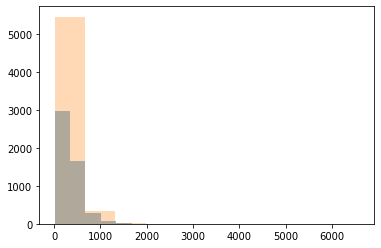

In [88]:
# две гистограммы на одном рисунке

av_rat_1 = db.iloc[1:5000, 3]
av_rat_2 = db.iloc[5001:11000, 3]
plt.hist(av_rat_1, alpha=0.5, histtype='stepfilled')
plt.hist(av_rat_2, alpha=0.3, histtype='stepfilled') 

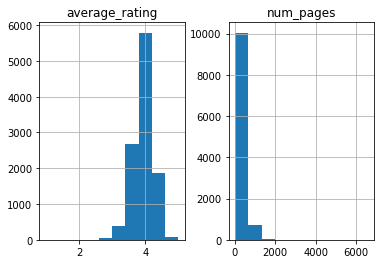

In [89]:
# несколько гистограмм отдельно на одной фигуре

cols = ['average_rating', 'num_pages']
db2[cols].hist()
plt.show()

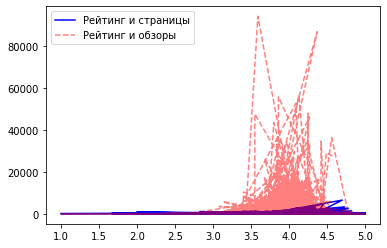

In [90]:
# два графика на одном рисунке

fig, ax = plt.subplots()
ax.plot(db['average_rating'], db['num_pages'], '-b', label='Рейтинг и страницы')
ax.plot(db['average_rating'], db['text_reviews_count'], '--r', label='Рейтинг и обзоры', alpha=0.5)
leg = ax.legend() 

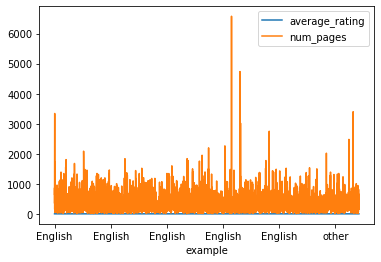

In [91]:
# построение по нескольким столбцам

y_columns = ['average_rating', 'num_pages']
db2.plot(x='example', y=y_columns)
plt.show()

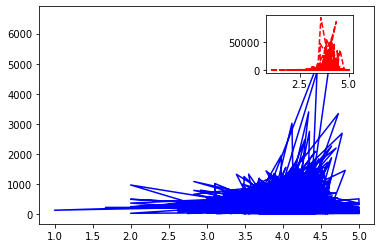

In [92]:
# график в графике

ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax1.plot(db['average_rating'], db['num_pages'], '-b', label='Рейтинг и страницы')
ax2.plot(db['average_rating'], db['text_reviews_count'], '--r', label='Рейтинг и обзоры') 

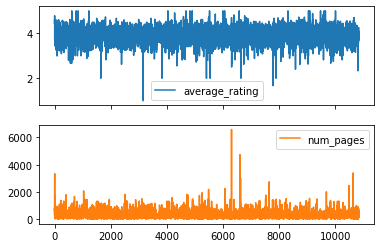

In [93]:
# два отдельных графика, если единицы не соизмеримы у двух столбцов

cols = ['average_rating', 'num_pages']
db2[cols].plot(subplots=True)
plt.show()

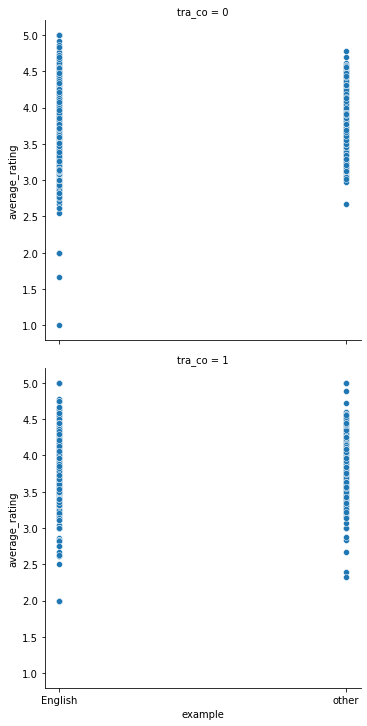

In [94]:
# создание сабплотов по трем признакам: 
# два на графике, каждый график сгруппирован по третьему признаку

sns.relplot(x="example", y="average_rating", 
            data=db2,
            kind="scatter", 
            row="tra_co")
plt.show()

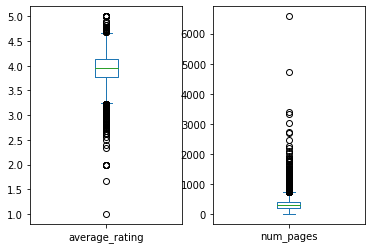

In [95]:
# или боксплота два

cols = ['average_rating', 'num_pages']
db2[cols].plot(kind='box', subplots=True)
plt.show()

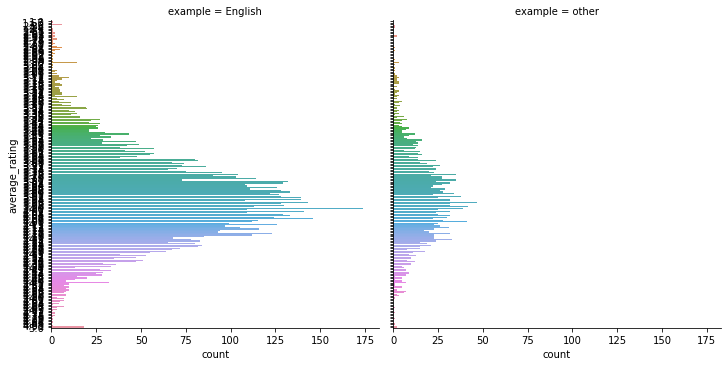

In [96]:
# сабплоты по категории из третьего признака

sns.catplot(y="average_rating", col='example', data=db2,
            kind="count")
plt.show()

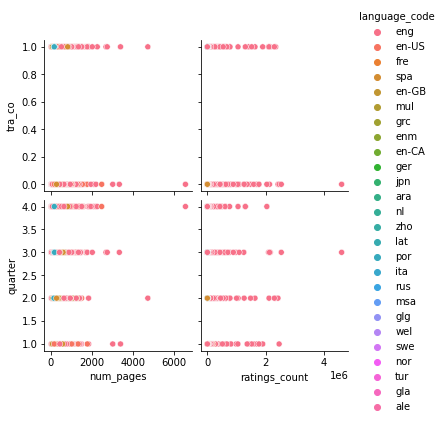

<Figure size 432x288 with 0 Axes>

In [97]:
# в рядах можно поставить различные признаки

sns.pairplot(data=db2,
        x_vars=["num_pages", "ratings_count"],
        y_vars=['tra_co', 'quarter'],
        kind='scatter',
        hue='language_code',
        palette='husl')
plt.show()
plt.clf()

In [98]:
"""

# приводится для примера

# добавляем логарифмическую шкалу

plt.xscale('log')

# изменяем подписи на оси x

plt.xticks(tick_val, tick_lab)

# размер точки на графике

plt.scatter(gdp_cap, life_exp, s = np_pop)

# меняем цвет и прозрачность точек

plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)
 
# подписываем отдельные точки

plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# ограничиваем значения по шкалам 

plt.xlim(20, 55)
plt.ylim(20, 55)

# параметр графика, который определяет цвет подписей, сетки и т.п.

axes.tick_params('y', colors=color)

# поворот подписей

plt.xticks(rotation=90)

"""

"\n\n# приводится для примера\n\n# добавляем логарифмическую шкалу\n\nplt.xscale('log')\n\n# изменяем подписи на оси x\n\nplt.xticks(tick_val, tick_lab)\n\n# размер точки на графике\n\nplt.scatter(gdp_cap, life_exp, s = np_pop)\n\n# меняем цвет и прозрачность точек\n\nplt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)\n \n# подписываем отдельные точки\n\nplt.text(1550, 71, 'India')\nplt.text(5700, 80, 'China')\n\n# ограничиваем значения по шкалам \n\nplt.xlim(20, 55)\nplt.ylim(20, 55)\n\n# параметр графика, который определяет цвет подписей, сетки и т.п.\n\naxes.tick_params('y', colors=color)\n\n# поворот подписей\n\nplt.xticks(rotation=90)\n\n"

# Построение отдельных элементов графиков

Text(0, 0.5, 'оценка')

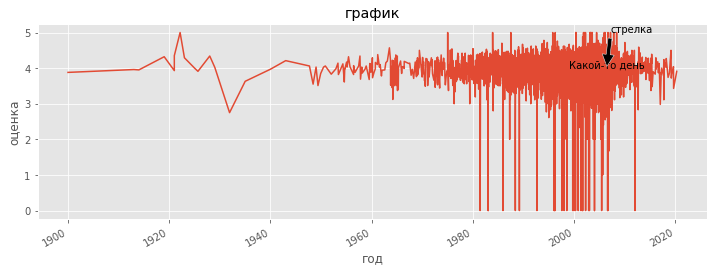

In [99]:
# надпись и стрекла на графике

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 4))
db6['average_rating'].plot(ax=ax)
ax.text('2006-05-28', 4, 'Какой-то день', ha='center') 
ax.annotate('стрелка', xy=('2006-05-28', 4), xytext=('2007-02-27', 5), arrowprops=dict(facecolor='black', shrink=0.05)) 
plt.title('график')
plt.xlabel('год')
plt.ylabel('оценка') 

In [100]:
"""
# приводится для примера

# нанести полосы

plt.fill_between(train_sizes, train_mean - train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

"""

"\n# приводится для примера\n\n# нанести полосы\n\nplt.fill_between(train_sizes, train_mean - train_std, train_mean+train_std, color='#DDDDDD')\nplt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')\n\n"

<AxesSubplot:xlabel='num_pages', ylabel='average_rating'>

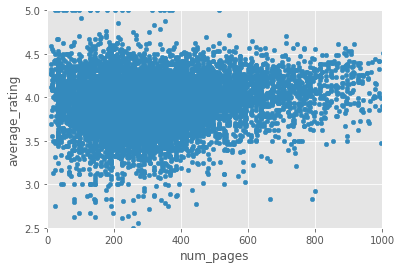

In [101]:
# выбираем для изучения конкретный кусок графика
# увеличиваем график

db.plot.scatter(x='num_pages', y='average_rating', xlim=[0, 1000], ylim=[2.5, 5]) 

# Графики временных рядов

<AxesSubplot:xlabel='publication_date'>

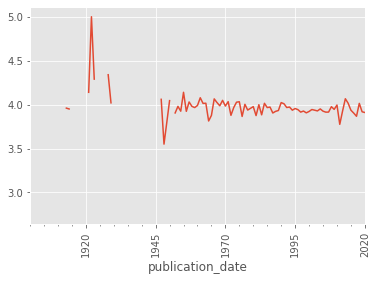

In [102]:
# среднее на начало года

db6.resample('AS')['average_rating'].mean().plot(rot=90) 

<AxesSubplot:xlabel='publication_date'>

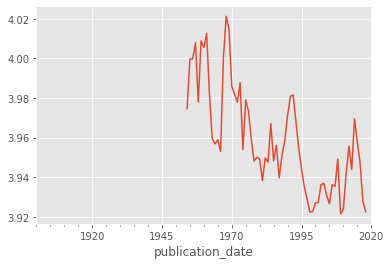

In [103]:
# берем среднее за год. Затем делаем скользящее окно в 10 лет и береме среднее уже за этот период

db6.resample('AS')['average_rating'].mean().rolling(5, center=True).mean().plot() 

<AxesSubplot:xlabel='publication_date'>

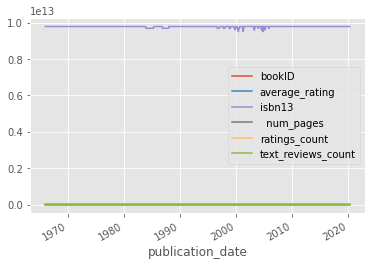

In [104]:
# данные в интервале окна
# берет именно по 100 значений, а не даты сглаживание

db6.sort_index().rolling(window=100).mean().plot() 

In [105]:
"""
# приводится для примера

# измеряем среднее значение выборки, то есть периода заданного окном

mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
db[['average_rating', 'num_pages']].rolling(window=100, center=True).apply(mean_abs_dev).plot()

"""

"\n# приводится для примера\n\n# измеряем среднее значение выборки, то есть периода заданного окном\n\nmean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()\ndb[['average_rating', 'num_pages']].rolling(window=100, center=True).apply(mean_abs_dev).plot()\n\n"

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:6388: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(
C:\Users\runaz\AppData\Local\Temp/ipykernel_21296/3334698753.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = data['1950-01':'2010-06'].resample('1Y').sum()


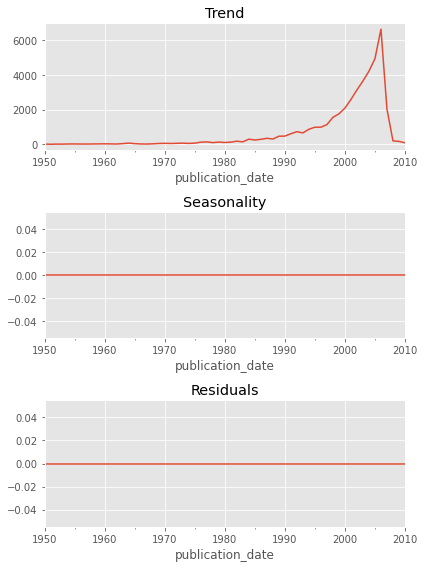

In [106]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# разбиваем на тренд, сезонность и необъясненный остаток

data = db6[['average_rating']]
data.sort_index(inplace=True)
data = data['1950-01':'2010-06'].resample('1Y').sum()
decomposed =seasonal_decompose(data)
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

# Особенности seaborn

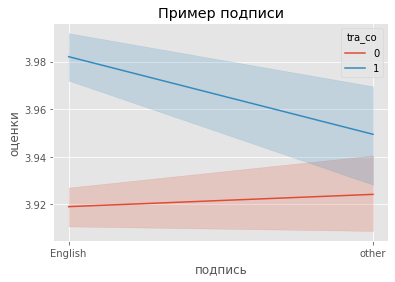

In [107]:
# подпись осей в seaborn

g = sns.lineplot(y="average_rating", x='example', 
                 data=db2,
                 hue="tra_co")
g.set(xlabel='подпись', ylabel='оценки')
g.set_title('Пример подписи')
plt.show()

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


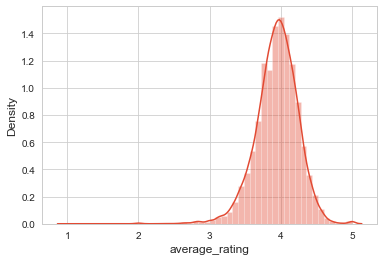

<Figure size 432x288 with 0 Axes>

In [108]:
# изменение стиля в seaborn

sns.set_style('whitegrid')
sns.distplot(db['average_rating'])
plt.show()
plt.clf()


C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


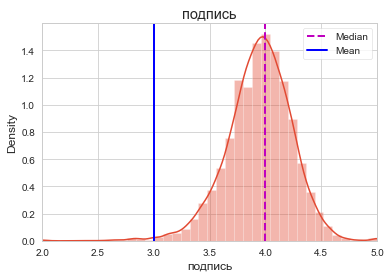

In [109]:
# рисуем дополнительные линии,
# ограничиваем оси

fig, ax = plt.subplots()
sns.distplot(db['average_rating'], ax=ax)
ax.set(xlabel="подпись", xlim=(2,5), title="подпись")
ax.axvline(x=4.0, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=3.0, color='b', label='Mean', linestyle='-', linewidth=2)
ax.legend()
plt.show()

<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

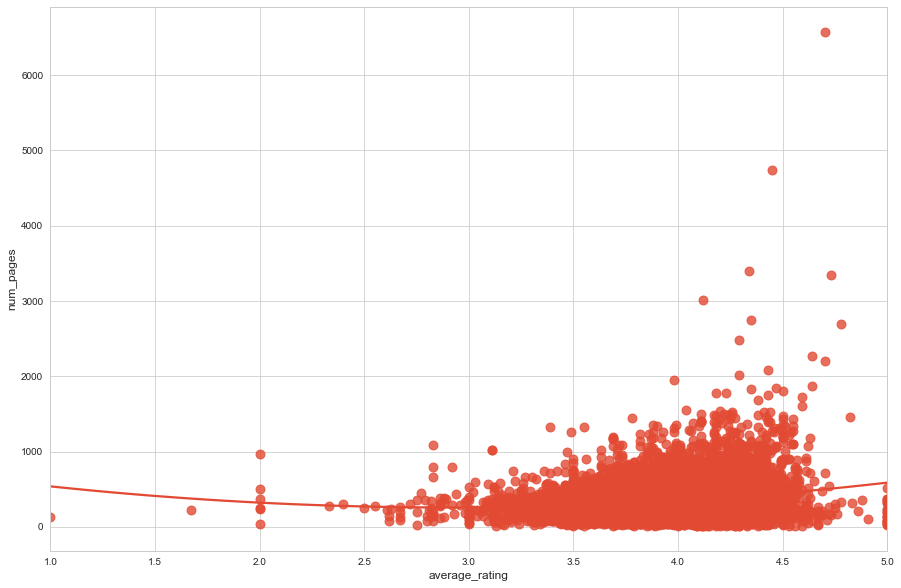

In [110]:
# изменение размера точек
# отключение доверительного интервала
# полиномиальная регрессия

fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='average_rating', y='num_pages', data = db, ci=None, scatter_kws={'s':80}, order=2) 

# Работа с векторами, матрицами

In [111]:
# вектор, построенный на значениях
# от 0 до 17

np.array(list(range(18)))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [112]:
# нулевой вектор

np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
# единичная матрица

np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [114]:
# матрица размерности в 3 строки
# и 5 столбцов
# пересечения заполнены восьмерками

np.full((3, 5), 8)

array([[8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8]])

In [115]:
# вектор из значений от 0 до 40
# с шагом в 4

np.arange(0, 40, 4)

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36])

In [116]:
# вектор с 4 значениями, 
# отобранными из равномерного распределения
# в интервале от 0 до 8

np.linspace(0, 8, 4)

array([0.        , 2.66666667, 5.33333333, 8.        ])

In [117]:
# вектор с 8 значениями
# из интервала от 0 до 1
# 1 не входит

np.random.random(8)

array([0.99109945, 0.76467479, 0.68400159, 0.85348864, 0.79239825,
       0.02528821, 0.42467036, 0.64567774])

In [118]:
# вектор из нормального распределения
# со средним 1 и стандартным отклонением 2
# всего 3 числа

np.random.normal(1, 2, 3)

array([0.74411213, 0.09606048, 1.18901994])

In [119]:
# вектор целых случайных чисел
# от 0 до 10
# всего 5 значений

np.random.randint(0, 10, 5)

array([2, 4, 6, 3, 7])

In [120]:
# преобразуем вектор в матрицу

np.arange(1, 10).reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [121]:
# вектор с 3 случайными значениями
# в интервале от 0 до 5

np.random.choice(5, 3)

array([0, 3, 1])

# Оценка распределения

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_rating', ylabel='Density'>

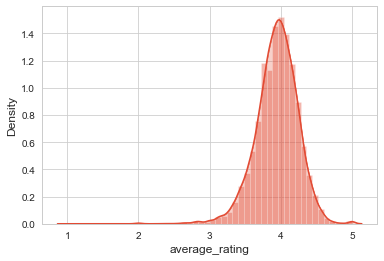

In [122]:
# оценка плотности распределения

sns.kdeplot(db['average_rating'], shade=True) 

# плотность и количество

sns.distplot(db['average_rating'])

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

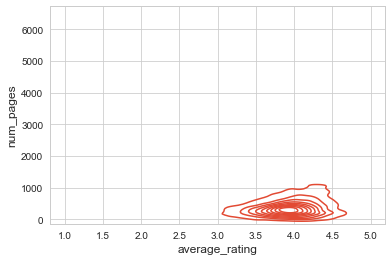

In [123]:
# двумерный график ядерной оценки плотности

sns.kdeplot(db['average_rating'], db['num_pages']) 

C:\Users\runaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


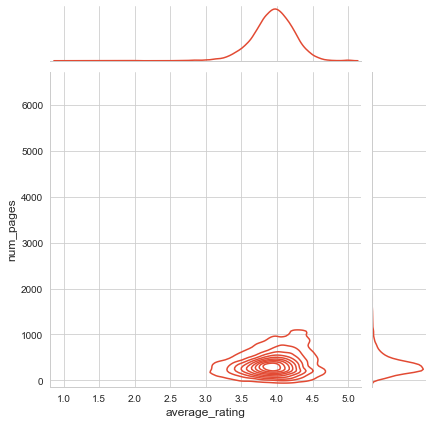

In [124]:
# ядерная оценка плотности плюс гистограммы

sns.jointplot(db['average_rating'], db['num_pages'], kind='kde')

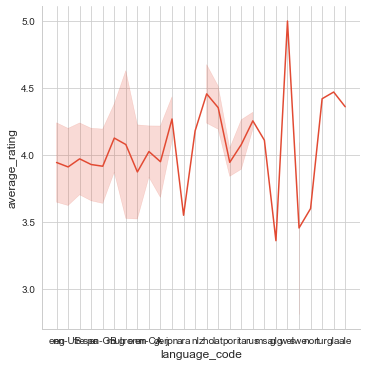

In [125]:
# доверительные интервалы по стандартному отклонению

sns.relplot(x='language_code', y="average_rating",
            data=db2, kind="line", ci='sd')
plt.show()

# Статистические тесты

In [128]:
! pip install mlxtend

In [129]:
# перестановочный тест

X = db[db['decade']==2000]['average_rating'] 
y = db[db['decade'] == 1990]['average_rating']
from mlxtend.evaluate import permutation_test 
p_value = permutation_test(X, y,
                           method='approximate',
                           num_rounds=10000,
                           seed=0) 

In [142]:
# t-test на разницу средних между группами

! pip install researchpy

import researchpy as rp

summary, result = rp.ttest(group1 = db2['average_rating'][db2['language_code'] == 'eng'], group1_name='eng', group2 = db2['average_rating'][db2['language_code'] == 'spa'], group2_name='spa')

summary 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,eng,8669.0,3.944010,0.296334,0.003183,3.937771,3.950249
1,spa,217.0,3.928664,0.270650,0.018373,3.892450,3.964877
2,combined,8886.0,3.943635,0.295729,0.003137,3.937485,3.949785


Интепретация состоит в следующем. Разница между книгами на английском и книгами на испанском меньше нуля. Нулевая гипотеза - средние равны. Эта гипотеза отвергается, так как у нее вероятность 0.

Text(4.4, 1.0, '$\\mu =  3.9, \\ sigma =  0.3$')

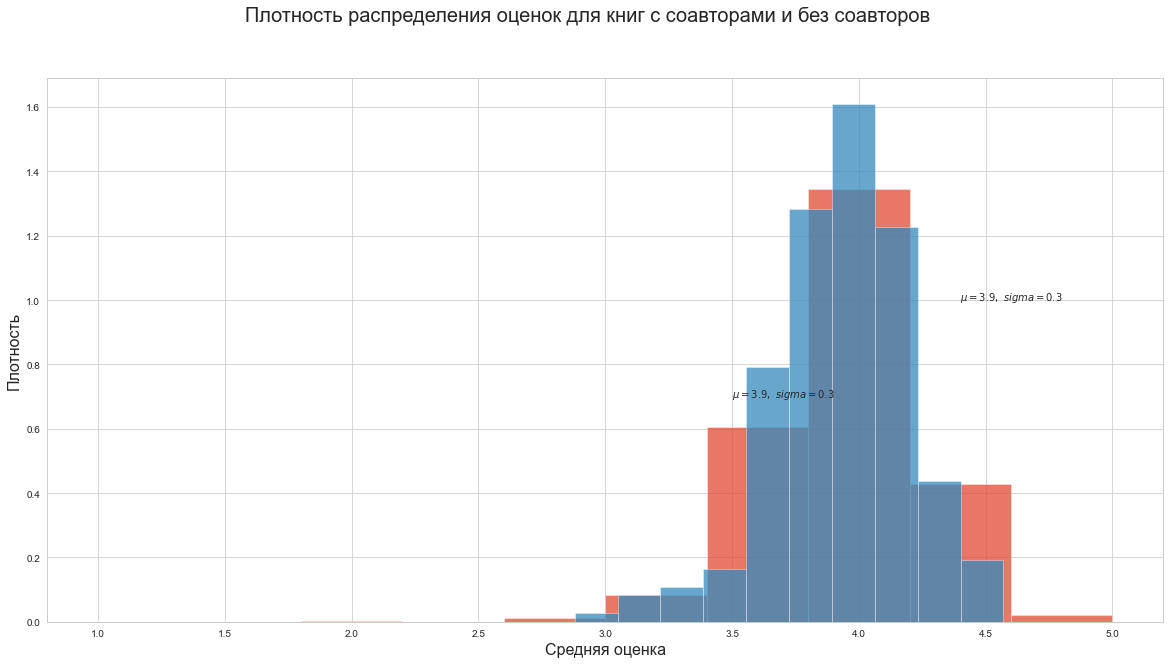

In [132]:
# визуальная проверка равенства средних

fig = plt.figure(figsize=(20, 10)) 
ax = fig.add_subplot(111)

coauthors = plt.hist(db2['average_rating'][db2['language_code'] == 'eng'], label='eng', alpha=0.75, density=True)
not_coauthors = plt.hist(db2['average_rating'][db2['language_code'] == 'spa'], label='spa', alpha=0.75, density=True)

plt.suptitle('Плотность распределения оценок для книг с соавторами и без соавторов', fontsize=20)
plt.xlabel('Средняя оценка', fontsize=16)
plt.ylabel('Плотность', fontsize=16)

plt.text(3.5, 0.7, f"$\mu = {db2['average_rating'][db2['language_code'] == 'eng'].mean(): .1f}, \\ sigma = {db2['average_rating'][db2['language_code'] == 'eng'].std(): .1f}$")
plt.text(4.4, 1.0, f"$\mu = {db2['average_rating'][db2['language_code'] == 'spa'].mean(): .1f}, \\ sigma = {db2['average_rating'][db2['language_code'] == 'spa'].std(): .1f}$")

In [133]:
from scipy.stats import chi2_contingency as stats

# применение хи квадрата

crosstab = pd.crosstab(db['decade'], db['quarter'])
stats(crosstab) 

(72.62802136454216,
 1.324024527542344e-07,
 21,
 array([[   5.20871009,    5.49492526,    5.78723012,    5.50913453],
        [   6.86602694,    7.24331057,    7.62862152,    7.26204097],
        [  17.04668758,   17.98339177,   18.94002584,   18.02989481],
        [  47.35190995,   49.95386603,   52.61118288,   50.08304115],
        [ 144.42332534,  152.35929138,  160.46410777,  152.75327551],
        [ 576.74626315,  608.43808821,  640.80420742,  610.01144123],
        [1735.92101864, 1831.30872855, 1928.7259642 , 1836.04428861],
        [  32.43605831,   34.21839823,   36.03866027,   34.30688319]]))

In [134]:
# еще один вариант хи квадрата

crosstab, test_results, expected = rp.crosstab(db['decade'], db['quarter'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell") #еще способ

In [135]:
from scipy import stats

# тест на нормальность D'Agostino-Pearson

stats.normaltest(db['average_rating']) 

NormaltestResult(statistic=1502.6234008717036, pvalue=0.0)

# Метрики

In [136]:
# считаем дисперсию

db.var() 

C:\Users\runaz\AppData\Local\Temp/ipykernel_21296/1011495623.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.var()


average_rating        8.725347e-02
num_pages             5.690915e+04
ratings_count         1.296547e+10
text_reviews_count    6.756518e+06
decade                6.881660e+01
                          ...     
tra_co                2.402205e-01
multivolume           1.866608e-01
len_title             5.261888e+02
polarity              3.749973e-02
subjectivity          7.293274e-02
Length: 11, dtype: float64

In [137]:
# считаем ковариацию

db.cov() 

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
average_rating,0.087253,12.283359,1.393291e+03,2.660359e+01,-0.096513,0.008405,0.013268,0.012597,0.730491,0.001165,0.001418
num_pages,12.283359,56909.146836,8.170480e+05,1.934607e+04,-18.440790,7.660052,-4.853880,5.571329,125.863033,-1.167482,-2.217905
ratings_count,1393.291040,817048.023258,1.296547e+10,2.565132e+08,41747.959611,-2321.125401,-1548.319510,2385.791647,-153127.335024,-419.684921,-527.103347
text_reviews_count,26.603589,19346.070598,2.565132e+08,6.756518e+06,1368.809697,-81.921655,-70.936496,39.373893,-4156.258149,-9.980991,-8.689312
decade,-0.096513,-18.440790,4.174796e+04,1.368810e+03,68.816596,0.225212,-0.165851,0.316513,-4.419266,-0.005145,0.049774
...,...,...,...,...,...,...,...,...,...,...,...
tra_co,0.013268,-4.853880,-1.548320e+03,-7.093650e+01,-0.165851,0.009883,0.240220,-0.019570,0.732916,0.000420,0.000644
multivolume,0.012597,5.571329,2.385792e+03,3.937389e+01,0.316513,-0.006044,-0.019570,0.186661,-1.680835,-0.002180,-0.004005
len_title,0.730491,125.863033,-1.531273e+05,-4.156258e+03,-4.419266,0.369008,0.732916,-1.680835,526.188848,0.585917,1.615853
polarity,0.001165,-1.167482,-4.196849e+02,-9.980991e+00,-0.005145,0.000661,0.000420,-0.002180,0.585917,0.037500,0.015872


In [138]:
# считаем корреляцию

db.corr() 

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity
average_rating,1.000000,0.174315,0.041424,0.034649,-0.039387,0.025721,0.091648,0.098706,0.107808,0.020369,0.017777
num_pages,0.174315,1.000000,0.030079,0.031199,-0.009318,0.029027,-0.041514,0.054056,0.023000,-0.025272,-0.034426
ratings_count,0.041424,0.030079,1.000000,0.866671,0.044197,-0.018427,-0.027744,0.048497,-0.058626,-0.019033,-0.017141
text_reviews_count,0.034649,0.031199,0.866671,1.000000,0.063480,-0.028490,-0.055681,0.035061,-0.069706,-0.019829,-0.012378
decade,-0.039387,-0.009318,0.044197,0.063480,1.000000,0.024542,-0.040791,0.088312,-0.023224,-0.003203,0.022217
...,...,...,...,...,...,...,...,...,...,...,...
tra_co,0.091648,-0.041514,-0.027744,-0.055681,-0.040791,0.018229,1.000000,-0.092419,0.065190,0.004428,0.004867
multivolume,0.098706,0.054056,0.048497,0.035061,0.088312,-0.012646,-0.092419,1.000000,-0.169601,-0.026054,-0.034322
len_title,0.107808,0.023000,-0.058626,-0.069706,-0.023224,0.014542,0.065190,-0.169601,1.000000,0.131902,0.260837
polarity,0.020369,-0.025272,-0.019033,-0.019829,-0.003203,0.003087,0.004428,-0.026054,0.131902,1.000000,0.303495


In [139]:
# подсчет эксцесса

db.kurtosis()

C:\Users\runaz\AppData\Local\Temp/ipykernel_21296/4039384166.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.kurtosis()


average_rating          3.191426
num_pages              66.413795
ratings_count         432.173538
text_reviews_count    392.069659
decade                  8.482449
                         ...    
tra_co                 -1.837067
multivolume            -0.641938
len_title               5.481571
polarity                8.474003
subjectivity            2.015817
Length: 11, dtype: float64

In [140]:
# подсчет смещения

db.skew()

C:\Users\runaz\AppData\Local\Temp/ipykernel_21296/3298537221.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.skew()


average_rating        -0.677534
num_pages              4.488837
ratings_count         17.498529
text_reviews_count    16.090644
decade                -2.428277
                        ...    
tra_co                 0.404069
multivolume            1.165410
len_title              1.916094
polarity               1.384707
subjectivity           1.754471
Length: 11, dtype: float64

# Робастные методы

In [143]:
! pip install pingouin

  Using cached pingouin-0.4.0.tar.gz (206 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached xarray-0.19.0-py3-none-any.whl (827 kB)
  Using cached littleutils-0.2.2.tar.gz (6.6 kB)
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=47f9f8e5077053c072eab9557221aa1c6ebef3be7cf34c45e7edb159029c323f
  Stored in directory: c:\users\runaz\appdata\local\pip\cache\wheels\6a\18\81\a920759e142b141a5beebab592730fe87060c01651e57513ad
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=e1b992cff34be8d2e8de1166804ccb64390ebf373b4b8d5416940c08f49dacdd
  Stored in directory: c:\users\runaz\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils


In [144]:
import pingouin as pg

# робастная корреляция

pg.pairwise_corr(db, columns=[['average_rating'], ['num_pages', 'ratings_count', 'text_reviews_count']], method='bicor', padjust='bonf') 

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,average_rating,num_pages,bicor,two-sided,10838,0.105319,"[0.09, 0.12]",4.101514e-28,1.230454e-27,bonf,1.000000
1,average_rating,ratings_count,bicor,two-sided,10838,0.035014,"[0.02, 0.05]",2.664516e-04,7.993547e-04,bonf,0.954139
2,average_rating,text_reviews_count,bicor,two-sided,10838,0.013342,"[-0.01, 0.03]",1.648608e-01,4.945825e-01,bonf,0.284400


<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

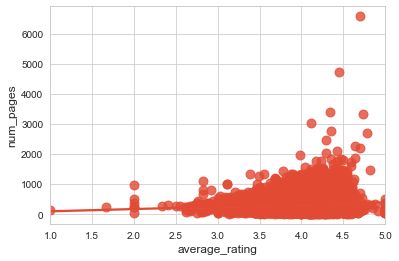

In [145]:
# робастная регрессия

sns.regplot(x='average_rating', y='num_pages', data=db, scatter_kws={'s':80}, robust=True) 

# Вероятность

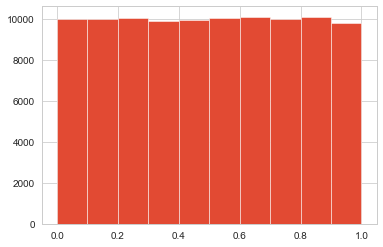

In [146]:
# подбрасываем монетки

np.random.seed(42)
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
_ = plt.hist(random_numbers)
plt.show()

In [147]:
# перемешиваем данные 

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]    
    return perm_sample_1, perm_sample_2

# Приведение к нормальному распределению

In [148]:
"""
# приводится для примера

# способы преобразования признаков, 
# если они не соответствуют нормальному распределению

def logf(x): 
    x = np.log(x+0.01) 
    return x

for x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:
    db[x] = db[x].apply(logf)

"""

"\n# приводится для примера\n\n# способы преобразования признаков, \n# если они не соответствуют нормальному распределению\n\ndef logf(x): \n    x = np.log(x+0.01) \n    return x\n\nfor x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:\n    db[x] = db[x].apply(logf)\n\n"

In [149]:
"""
# приводится для примера

# способы преобразования признаков, 
# если они не соответствуют нормальному распределению

def sqr(x):
    x = x ** 2
    return x
for x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:
    db[x] = db[x].apply(sqr)
for x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:
    stats.probplot(np.array(db[x]), plot=plt)
    plt.show()

"""

"\n# приводится для примера\n\n# способы преобразования признаков, \n# если они не соответствуют нормальному распределению\n\ndef sqr(x):\n    x = x ** 2\n    return x\nfor x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:\n    db[x] = db[x].apply(sqr)\nfor x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:\n    stats.probplot(np.array(db[x]), plot=plt)\n    plt.show()\n\n"

In [150]:
"""
# приводится для примера

# преобразование данных к нормальному распределению

# кубический корень

sns.distplot(np.sign(train['average_rating']) * (train['average_rating'].abs() ** (1/3)), fit=norm) 
fig = plt.figure()
res = stats.probplot(np.sign(train['average_rating']) * (train['average_rating'].abs() ** (1/3)), plot=plt)

"""

"\n# приводится для примера\n\n# преобразование данных к нормальному распределению\n\n# кубический корень\n\nsns.distplot(np.sign(train['average_rating']) * (train['average_rating'].abs() ** (1/3)), fit=norm) \nfig = plt.figure()\nres = stats.probplot(np.sign(train['average_rating']) * (train['average_rating'].abs() ** (1/3)), plot=plt)\n\n"

In [151]:
"""
# приводится для примера

# преобразование данных к нормальному распределению

# свернутый корень

sns.distplot(np.sign(train['average_rating']) * np.sqrt(np.sqrt(train['average_rating'].abs())), fit=norm) 
fig = plt.figure()
res = stats.probplot(np.sign(train['average_rating']) * np.sqrt(np.sqrt(train['average_rating'].abs())), plot=plt)

"""

"\n# приводится для примера\n\n# преобразование данных к нормальному распределению\n\n# свернутый корень\n\nsns.distplot(np.sign(train['average_rating']) * np.sqrt(np.sqrt(train['average_rating'].abs())), fit=norm) \nfig = plt.figure()\nres = stats.probplot(np.sign(train['average_rating']) * np.sqrt(np.sqrt(train['average_rating'].abs())), plot=plt)\n\n"

# Обработка выбросов

In [152]:
"""
# приводится для примера

# удаление выбросов 

for x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:
    q1, q3 = np.percentile(db[x], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    db = db.loc[(db[x] < upper_bound) & (db[x] > lower_bound)]

"""

"\n# приводится для примера\n\n# удаление выбросов \n\nfor x in ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']:\n    q1, q3 = np.percentile(db[x], [25, 75])\n    iqr = q3 - q1\n    lower_bound = q1 - (iqr * 1.5)\n    upper_bound = q3 + (iqr * 1.5)\n    db = db.loc[(db[x] < upper_bound) & (db[x] > lower_bound)]\n\n"

In [153]:
# еще один способ бороться с выбросами

db3 = db.copy()
db3['ratings_count_log'] = [np.log(x) for x in db3['ratings_count']] 
db3

C:\Users\runaz\AppData\Local\Temp/ipykernel_21296/4185527053.py:4: RuntimeWarning: divide by zero encountered in log
  db3['ratings_count_log'] = [np.log(x) for x in db3['ratings_count']]


,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume,len_title,polarity,subjectivity,ratings_count_log
0,harry potter half blood prince,4.57,eng,652,2095690,27591,2000,3,1,1,39,-0.166667,0.166667,14.555393
1,harry potter order phoenix,4.49,eng,870,2153167,29221,2000,3,1,1,42,0.000000,0.000000,14.582450
2,harry potter chamber secrets,4.42,eng,352,6333,244,2000,4,0,1,40,0.000000,0.000000,8.753529
3,harry potter prisoner azkaban,4.56,eng,435,2339585,36325,2000,2,1,1,41,0.000000,0.000000,14.665484
4,harry potter boxed set books 5,4.78,eng,2690,41428,164,2000,3,1,1,34,0.000000,0.000000,10.631712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,expelled eden a william t vollmann reader,4.06,eng,512,156,20,2000,4,1,1,48,0.000000,0.000000,5.049856
10834,you bright risen angels,4.08,eng,635,783,56,1980,4,0,0,27,0.700000,0.800000,6.663133
10835,the ice shirt,3.96,eng,415,820,95,1990,3,0,1,14,0.000000,0.000000,6.709304
10836,poor people,3.72,eng,434,769,139,2000,1,0,0,11,-0.400000,0.600000,6.645091


In [154]:
from scipy import stats

db3 = db.copy()
db3 = db3.drop(['title', 'decade', 'quarter', 'tra_co', 'multivolume', 'language_code'], axis=1)

# удаляем выбросы

db_filtered = db3[np.abs(stats.zscore(db3) < 3).all(axis=1)]
db_filtered

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
2,4.42,352,6333,244,40,0.000000,0.000000
5,3.74,152,19,1,87,-0.166667,0.166667
7,4.38,815,3628,254,68,0.050000,0.700000
9,4.22,215,4930,460,37,0.000000,0.000000
12,3.44,55,7270,499,27,0.000000,0.000000
...,...,...,...,...,...,...,...
10832,3.69,160,932,111,17,0.000000,0.000000
10833,4.06,512,156,20,48,0.000000,0.000000
10835,3.96,415,820,95,14,0.000000,0.000000
10836,3.72,434,769,139,11,-0.400000,0.600000


# Машинное обучение 

In [155]:
# отбор признаков с помощью Lasso
# если 0, то можно удалить признак, 
# а можно удалить и просто минимальные значения

X = db.drop(['average_rating', 'title', 'language_code'], axis=1)
y = db['average_rating']

from sklearn.linear_model import Lasso
reg_lasso = Lasso(alpha=0.5)
model_lasso = reg_lasso.fit(X, y)
model_lasso.coef_

array([ 2.04725570e-04,  1.06895811e-07, -3.76458764e-07, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.17115014e-04,
        0.00000000e+00,  0.00000000e+00])

In [156]:
"""

# приводится для примера

# правило для импутации

cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='No')) 

# правило для дамми-кодирования

cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))

# список этапов

cat_steps = [cat_si_step, cat_ohe_step] 

# задаем исполнение нашего списка этапов

cat_pipe = Pipeline(cat_steps) 

# указываем наш категориальный признак 

cat_cols = ['tra_co'] 

# обработка количественных

num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]
num_pipe = Pipeline(num_steps)
num_cols = ['num_pages', 'ratings_count', 'text_reviews_count']

transformers = [('cat', cat_pipe, cat_cols), 
                ('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=transformers)


# для обучающего

# это наши преобразованные признаки

X = ct.fit_transform(X_train) 
X.shape 

# обработка количественных для целевого

num_si_step1 = ('si', SimpleImputer(strategy='median'))
num_ss_step1 = ('ss', StandardScaler())
num_steps1 = [num_si_step1, num_ss_step1]
num_pipe1 = Pipeline(num_steps1)
num_cols1 = ['average_rating']
transformers = [('num', num_pipe1, num_cols1)]
ct1 = ColumnTransformer(transformers=transformers)

# это наш преобразованный целевой признак. Помним, что все это мы делаем на трейне

y = ct1.fit(y_train)

"""

"\n\n# приводится для примера\n\n# правило для импутации\n\ncat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='No')) \n\n# правило для дамми-кодирования\n\ncat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))\n\n# список этапов\n\ncat_steps = [cat_si_step, cat_ohe_step] \n\n# задаем исполнение нашего списка этапов\n\ncat_pipe = Pipeline(cat_steps) \n\n# указываем наш категориальный признак \n\ncat_cols = ['tra_co'] \n\n# обработка количественных\n\nnum_si_step = ('si', SimpleImputer(strategy='median'))\nnum_ss_step = ('ss', StandardScaler())\nnum_steps = [num_si_step, num_ss_step]\nnum_pipe = Pipeline(num_steps)\nnum_cols = ['num_pages', 'ratings_count', 'text_reviews_count']\n\ntransformers = [('cat', cat_pipe, cat_cols), \n                ('num', num_pipe, num_cols)]\nct = ColumnTransformer(transformers=transformers)\n\n\n# для обучающего\n\n# это наши преобразованные признаки\n\nX = ct.fit_transform(X_train) \nX.shape \n\n# обработка количест

In [157]:
"""
# приводится для примера

# пример применение конвейера

# обработка категориальных признаков

cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='No')) 
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore')) 
cat_steps = [cat_si_step, cat_ohe_step] 
cat_pipe = Pipeline(cat_steps) 
cat_cols = ['tra_co'] 
cat_transf = cat_pipe.fit_transform(X[cat_cols])

# обработка количественных

num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]
num_pipe = Pipeline(num_steps)
num_cols = ['num_pages', 'ratings_count', 'text_reviews_count']
num_transf = num_pipe.fit_transform(X[num_cols])


all = Pipeline([('cat', cat_transf), ('num', num_transf)])

"""

"\n# приводится для примера\n\n# пример применение конвейера\n\n# обработка категориальных признаков\n\ncat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='No')) \ncat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore')) \ncat_steps = [cat_si_step, cat_ohe_step] \ncat_pipe = Pipeline(cat_steps) \ncat_cols = ['tra_co'] \ncat_transf = cat_pipe.fit_transform(X[cat_cols])\n\n# обработка количественных\n\nnum_si_step = ('si', SimpleImputer(strategy='median'))\nnum_ss_step = ('ss', StandardScaler())\nnum_steps = [num_si_step, num_ss_step]\nnum_pipe = Pipeline(num_steps)\nnum_cols = ['num_pages', 'ratings_count', 'text_reviews_count']\nnum_transf = num_pipe.fit_transform(X[num_cols])\n\n\nall = Pipeline([('cat', cat_transf), ('num', num_transf)])\n\n"

In [158]:
"""
# приводится для примера

# способ отбора признаков

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFEалее 
select = RFE(RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1), n_features_to_select=5)
select.fit(X_train_dum, y_train)
X_train_rfe = select.transform(X_train_dum)
X_test_rfe = select.transform(X_test_dum)
mask = select.get_support()
feat_labels = X_train.columns
for c, feature in zip(mask, feat_labels):
    print(feature, c)

"""

'\n# приводится для примера\n\n# способ отбора признаков\n\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.feature_selection import RFEалее \nselect = RFE(RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1), n_features_to_select=5)\nselect.fit(X_train_dum, y_train)\nX_train_rfe = select.transform(X_train_dum)\nX_test_rfe = select.transform(X_test_dum)\nmask = select.get_support()\nfeat_labels = X_train.columns\nfor c, feature in zip(mask, feat_labels):\n    print(feature, c)\n\n'

In [159]:
"""
# приводится для примера

# создание признаков для прогнозирования

xfit = np.array([789, 24784, 3857])
xfit = xfit.reshape(1, -1) # обязательно надо преобразовать в матрицу
yfit = model.predict(xfit)

"""

'\n# приводится для примера\n\n# создание признаков для прогнозирования\n\nxfit = np.array([789, 24784, 3857])\nxfit = xfit.reshape(1, -1) # обязательно надо преобразовать в матрицу\nyfit = model.predict(xfit)\n\n'